In [1]:
#import necessary libraries
import pandas as pd
from pandas_datareader import wb

In [2]:
'''
https://data.worldbank.org/indicator/LP.LPI.OVRL.XQ?view=chart
Data describe
LPI OVRL: Logistics performance index: Overall (1=low to 5=high)
LPI LOGS: Logistics performance index: Competence and quality of logistics services (1=low to 5=high)
LPI ITRN: Logistics performance index: Ease of arranging competitively priced shipments (1=low to 5=high)
LPI TIME: Logistics performance index: Frequency with which shipments reach consignee within scheduled or expected time (1=low to 5=high)
LPI INFR: Logistics performance index: Quality of trade and transport-related infrastructure (1=low to 5=high)
LPI CUST: Logistics performance index: Efficiency of customs clearance process (1=low to 5=high)
LPI TRAC: Logistics performance index: Ability to track and trace consignments (1=low to 5=high)
EXP DURS: Lead time to export, median case (days)
IMP DURS: Lead time to import, median case (days)
 '''

LogisticsPerformanceIndex=['LP.LPI.OVRL.XQ','LP.LPI.LOGS.XQ','LP.LPI.ITRN.XQ','LP.LPI.TIME.XQ','LP.LPI.INFR.XQ','LP.LPI.CUST.XQ','LP.LPI.TRAC.XQ','LP.EXP.DURS.MD','LP.IMP.DURS.MD']
DataHeader               =['LPI OVRL',      'LPI LOGS',      'LPI ITRN',      'LPI TIME',      'LPI INFR',      'LPI CUST',      'LPI TRAC',      'EXP DURS',      'IMP DURS']

raw_dataset = wb.download(indicator=LogisticsPerformanceIndex, country= 'all', start=2007, end=2022)
raw_dataset.columns = DataHeader

C:\Users\XPS_9310\AppData\Local\Temp\ipykernel_24344\316419810.py:18: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  raw_dataset = wb.download(indicator=LogisticsPerformanceIndex, country= 'all', start=2007, end=2022)


In [3]:
raw_dataset.head(-1)

LPI OVRL  LPI LOGS  LPI ITRN  LPI TIME  LPI INFR  LPI CUST  \
country     year                                                               
Afghanistan 2007      1.21      1.25      1.22      1.38      1.10      1.30   
            2008       NaN       NaN       NaN       NaN       NaN       NaN   
            2009       NaN       NaN       NaN       NaN       NaN       NaN   
            2010      2.24      2.09      2.24      2.61      1.87      2.22   
            2011       NaN       NaN       NaN       NaN       NaN       NaN   
...                    ...       ...       ...       ...       ...       ...   
Zimbabwe    2017       NaN       NaN       NaN       NaN       NaN       NaN   
            2018      2.12      2.16      2.06      2.39      1.83      2.00   
            2019       NaN       NaN       NaN       NaN       NaN       NaN   
            2020       NaN       NaN       NaN       NaN       NaN       NaN   
            2021       NaN       NaN       NaN       NaN       NaN       NaN   

                  LPI TRAC  EXP DURS  IMP DURS  
country     year                                
Afghanistan 2007      1.00       8.1      20.7  
            2008       NaN       NaN       NaN  
            2009       NaN       NaN       NaN  
            2010      2.37       2.0       4.0  
            2011       NaN       NaN       NaN  
...                    ...       ...       ...  
Zimbabwe    2017       NaN       NaN       NaN  
            2018      2.26       NaN       NaN  
            2019       NaN       NaN       NaN  
            2020       NaN       NaN       NaN  
            2021       NaN       NaN       NaN  

[4255 rows x 9 columns]

In [4]:
cleanNA_data = raw_dataset.dropna(how="all")
cleanNA_data.head(10)

LPI OVRL  LPI LOGS  LPI ITRN  LPI TIME  \
country                     year                                           
Afghanistan                 2007  1.210000  1.250000  1.220000  1.380000   
                            2010  2.240000  2.090000  2.240000  2.610000   
                            2012  2.300000  2.160000  2.330000  2.800000   
                            2014  2.069573  2.119709  1.986686  2.482138   
                            2016  2.141282  2.145073  2.375026  2.611203   
                            2018  1.950000  1.920000  2.100000  2.380000   
                            2022  1.900000  2.000000  1.800000  2.300000   
Africa Eastern and Southern 2007  2.385238  2.368095  2.419048  2.800952   
                            2010  2.380000  2.265000  2.538889  2.818333   
                            2012  2.464211  2.409474  2.431579  2.827895   

                                  LPI INFR  LPI CUST  LPI TRAC   EXP DURS  \
country                     year                                            
Afghanistan                 2007  1.100000  1.300000  1.000000   8.100000   
                            2010  1.870000  2.220000  2.370000   2.000000   
                            2012  2.000000  2.330000  2.100000   5.000000   
                            2014  1.818951  2.163453  1.847776        NaN   
                            2016  1.835473  2.011147  1.772402        NaN   
                            2018  1.810000  1.730000  1.700000        NaN   
                            2022  1.700000  2.100000  1.600000        NaN   
Africa Eastern and Southern 2007  2.145238  2.255238  2.326190   8.550000   
                            2010  2.013889  2.143333  2.408333   7.188000   
                            2012  2.340526  2.311579  2.442632  10.818182   

                                   IMP DURS  
country                     year             
Afghanistan                 2007  20.700000  
                            2010   4.000000  
                            2012        NaN  
                            2014        NaN  
                            2016        NaN  
                            2018        NaN  
                            2022        NaN  
Africa Eastern and Southern 2007   9.780000  
                            2010   5.654545  
                            2012  12.454545

In [5]:
cleanNA_data.shape

(1427, 9)

In [6]:
cleanNA_data.count(axis=0)

LPI OVRL    1407
LPI LOGS    1407
LPI ITRN    1407
LPI TIME    1407
LPI INFR    1407
LPI CUST    1407
LPI TRAC    1407
EXP DURS     928
IMP DURS     913
dtype: int64

In [7]:
dataset = cleanNA_data.dropna(how="any")
dataset = dataset.sample(frac=1.0, replace=True, random_state=1)
dataset.count(axis=0)

LPI OVRL    884
LPI LOGS    884
LPI ITRN    884
LPI TIME    884
LPI INFR    884
LPI CUST    884
LPI TRAC    884
EXP DURS    884
IMP DURS    884
dtype: int64

In [16]:
number_features = ['LPI OVRL',      'LPI LOGS',      'LPI ITRN',      'LPI TIME',      'LPI INFR',      'LPI CUST',      'LPI TRAC']
print(dataset[number_features].describe())


         LPI OVRL    LPI LOGS    LPI ITRN    LPI TIME    LPI INFR    LPI CUST  \
count  884.000000  884.000000  884.000000  884.000000  884.000000  884.000000   
mean     2.938513    2.885399    2.900596    3.346120    2.801696    2.734877   
std      0.567315    0.598013    0.498615    0.554755    0.678250    0.586482   
min      1.210000    1.250000    1.220000    1.380000    1.100000    1.111111   
25%      2.500000    2.421435    2.520556    2.920000    2.280000    2.285829   
50%      2.777089    2.758258    2.812115    3.237898    2.596891    2.587343   
75%      3.426605    3.346661    3.318338    3.845822    3.338429    3.221575   
max      4.219409    4.310000    4.235000    4.795714    4.370000    4.178941   

         LPI TRAC  
count  884.000000  
mean     2.954063  
std      0.612186  
min      1.000000  
25%      2.477171  
50%      2.803596  
75%      3.491478  
max      4.355787  


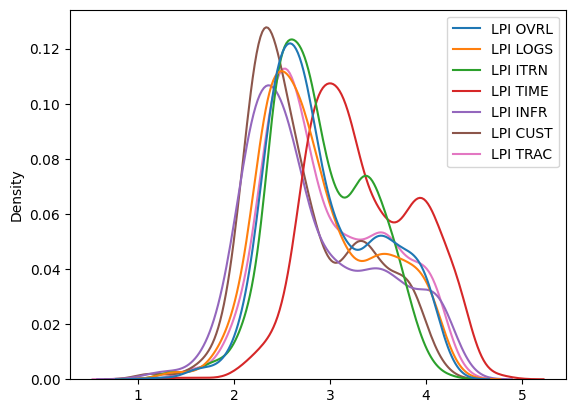

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

res = sns.kdeplot(dataset[number_features])
#res = sns.kdeplot(dataset['LPI TIME'])
plt.show()

[Text(0, 0.5, 'LPI'), Text(0.5, 1.0, 'Box Plot On LPI TRAC')]

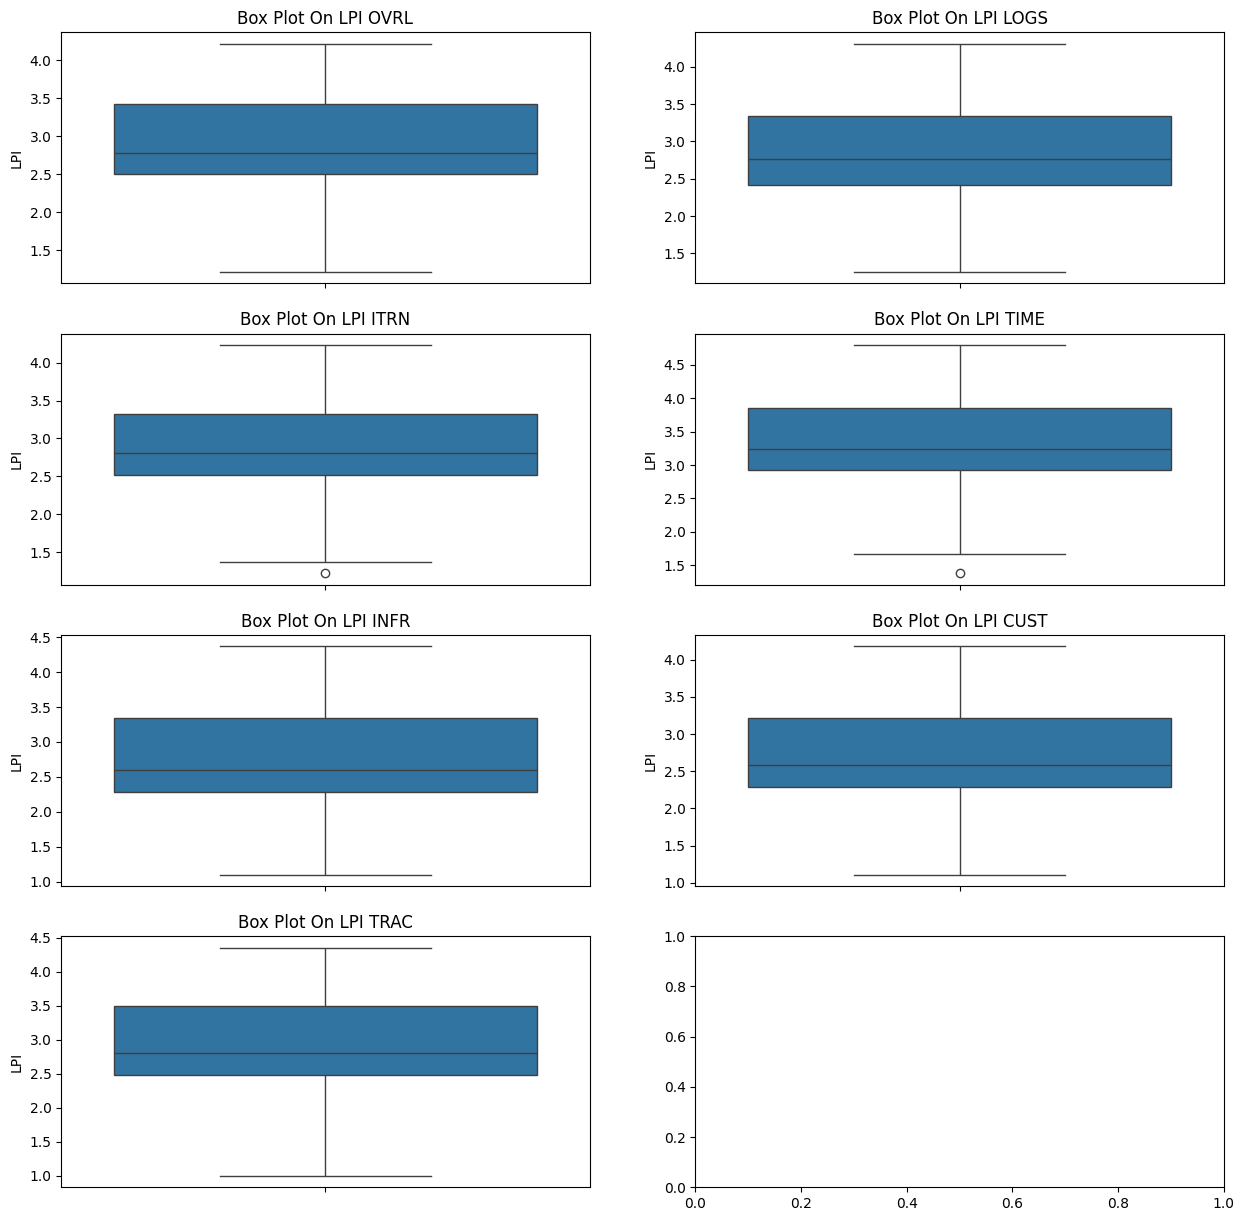

In [34]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15, 15)

sns.boxplot(data=dataset,y="LPI OVRL",orient="v",ax=axes[0][0])
sns.boxplot(data=dataset,y="LPI LOGS",orient="v",ax=axes[0][1])
sns.boxplot(data=dataset,y="LPI ITRN",orient="v",ax=axes[1][0])
sns.boxplot(data=dataset,y="LPI TIME",orient="v",ax=axes[1][1])
sns.boxplot(data=dataset,y="LPI INFR",orient="v",ax=axes[2][0])
sns.boxplot(data=dataset,y="LPI CUST",orient="v",ax=axes[2][1])
sns.boxplot(data=dataset,y="LPI TRAC",orient="v",ax=axes[3][0])

axes[0][0].set(ylabel='LPI',title="Box Plot On LPI OVRL")
axes[0][1].set(ylabel='LPI',title="Box Plot On LPI LOGS")
axes[1][0].set(ylabel='LPI',title="Box Plot On LPI ITRN")
axes[1][1].set(ylabel='LPI',title="Box Plot On LPI TIME")
axes[2][0].set(ylabel='LPI',title="Box Plot On LPI INFR")
axes[2][1].set(ylabel='LPI',title="Box Plot On LPI CUST")
axes[3][0].set(ylabel='LPI',title="Box Plot On LPI TRAC")

In [35]:
'''
Nhận xét: 
- Dựa vào biểu đồ phân phối xác suất ta thấy tập dữ liệu có phân phối không chuẩn (phân phối Gauss).\
Dạng phân phối này chỉ ảnh hưởng xấu đến các model tuyến tính như Linear Regression hoặc Logistic Regression.\
Còn đối với các model phi tuyến tính như DecisionTree thì không có ảnh hưởng đến kết quả dự đoán

- Dựa vào biểu đồ box ta có thể thấy tập data không có các giá trị ngoại lai, do đó không cần sử dụng các phương pháp loại bỏ giá trị ngoại lai
'''

'\nNhận xét: \n- Dựa vào biểu đồ phân phối xác suất ta thấy tập dữ liệu có phân phối không chuẩn (phân phối Gauss).Dạng phân phối này chỉ ảnh hưởng xấu đến các model tuyến tính như Linear Regression hoặc Logistic Regression.Còn đối với các model phi tuyến tính như DecisionTree thì không có ảnh hưởng đến kết quả dự đoán\n\n- Dựa vào biểu đồ box ta có thể thấy tập data không có các giá trị ngoại lai, do đó không cần sử dụng các phương pháp loại bỏ giá trị ngoại lai\n'

In [9]:
split_train = int(80 / 100 * len(dataset)) 
train = dataset[:split_train]
test = dataset[split_train:]
X_train = train.drop(columns=['EXP DURS','IMP DURS'])
y_train = train.drop(columns=['LPI OVRL','LPI LOGS','LPI ITRN','LPI TIME','LPI INFR','LPI CUST','LPI TRAC','IMP DURS'])

y_train = y_train.values.reshape(-1,1)

X_test = test.drop(columns=['EXP DURS','IMP DURS'])
y_test = test.drop(columns=['LPI OVRL','LPI LOGS','LPI ITRN','LPI TIME','LPI INFR','LPI CUST','LPI TRAC','IMP DURS'])

y_test = y_test.values.reshape(-1,1)

In [10]:
print(X_train.shape, "\n",y_train.shape)

(707, 7) 
 (707, 1)


In [11]:
print(X_test.shape, "\n",y_test.shape)

(177, 7) 
 (177, 1)


In [12]:
from sklearn.tree import DecisionTreeRegressor

my_tree = DecisionTreeRegressor(max_depth=15)
my_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15)

In [13]:
'''
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(100,40),dpi=300)
_ = tree.plot_tree(my_tree, filled=True)
plt.savefig('foo.png')
'''

"\nfrom sklearn import tree\nimport matplotlib.pyplot as plt\nfig = plt.figure(figsize=(100,40),dpi=300)\n_ = tree.plot_tree(my_tree, filled=True)\nplt.savefig('foo.png')\n"

In [14]:
for i in range(len(X_test)):
    test_index = i
    y_pred = my_tree.predict(X_test.values[test_index].reshape(1, -1))
    print ("True value: ",y_test[test_index], "\t\t predic value: ",y_pred)

score = my_tree.score(X_test, y_test)
print (score)

True value:  [1.] 		 predic value:  [6.14285714]
True value:  [2.23214286] 		 predic value:  [2.23214286]
True value:  [2.70588235] 		 predic value:  [2.]
True value:  [2.2] 		 predic value:  [3.5]
True value:  [2.] 		 predic value:  [2.]
True value:  [4.3] 		 predic value:  [4.3]
True value:  [1.] 		 predic value:  [3.]
True value:  [1.] 		 predic value:  [1.]
True value:  [2.] 		 predic value:  [2.]
True value:  [3.93] 		 predic value:  [3.55454545]
True value:  [2.10714286] 		 predic value:  [2.31172121]
True value:  [8.] 		 predic value:  [8.]
True value:  [2.] 		 predic value:  [2.]
True value:  [2.] 		 predic value:  [2.]
True value:  [5.] 		 predic value:  [5.]
True value:  [2.8] 		 predic value:  [3.]
True value:  [2.] 		 predic value:  [1.]
True value:  [4.38947368] 		 predic value:  [2.22222222]
True value:  [1.5] 		 predic value:  [1.]
True value:  [1.78571429] 		 predic value:  [1.78571429]
True value:  [2.55555556] 		 predic value:  [2.55555556]
True value:  [3.90909091] 	

C:\Users\XPS_9310\anaconda3\envs\AI\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\XPS_9310\anaconda3\envs\AI\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\XPS_9310\anaconda3\envs\AI\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\XPS_9310\anaconda3\envs\AI\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\XPS_9310\anaconda3\envs\AI\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\X

In [15]:
print (score)

0.7182842970860076
